# 06 - Création du dataset des données de jobs et de job_events fusionnées

Ce notebook génère 1 csv :

- merge_raw_jobs_and_clean_jobevents_dataset.csv

Etapes :

- Suppression des colonnes doublon dans les 2 datasets

- Fusion des datasets

# A. Imports

## a) Librairies

In [1]:
import os, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## b) Données

In [2]:
# source path
jobs = '../data/jobs/raw_jobs_dataset.csv'

# source path
events = '../data/jobs/clean_merge_job_events_dataset.csv'

# save target path
save_csv = '../data/jobs/merge_raw_jobs_and_clean_jobevents_dataset.csv'

# B. Dataframe

## a) Création des dataframes jobs et events

### 1. jobs

In [3]:
# création d'un dataframe à partir du csv de données
jobs_df = pd.read_csv(jobs, index_col=0)
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47073 entries, 0 to 47072
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   total_copies                  47073 non-null  int64  
 1   started_at                    47073 non-null  object 
 2   ended_at                      47073 non-null  object 
 3   speed                         47073 non-null  int64  
 4   operator                      47073 non-null  object 
 5   operator_level                47073 non-null  object 
 6   paperHeight                   47073 non-null  int64  
 7   paperWidth                    47073 non-null  int64  
 8   paperName                     47073 non-null  object 
 9   paperThickness                47073 non-null  int64  
 10  id_on_machine                 47073 non-null  int64  
 11  total_copies_requested        47073 non-null  int64  
 12  uses_ifoil                    47073 non-null  bool   
 13  u

### 2. job events

In [4]:
# création d'un dataframe à partir du csv de données
events_df = pd.read_csv(events, index_col=0)
events_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47837 entries, 0 to 47836
Data columns (total 44 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   jobId                                                  47837 non-null  int64  
 1   timestamp_start                                        47837 non-null  object 
 2   totalCopies_start                                      47837 non-null  int64  
 3   jsonVersion_x                                          34053 non-null  float64
 4   LED_iper                                               47837 non-null  int64  
 5   bars_iper                                              47837 non-null  object 
 6   drops_iper                                             47837 non-null  int64  
 7   dithering_iper                                         47837 non-null  bool   
 8   deadPixelsOffset_iper                         

## b) Création d'un dataframe fusionné

### 1. Suppression de colonnes

In [5]:
# suppression des colonnes avec des valeurs uniques
for col in list(jobs_df.columns):
    if jobs_df[col].nunique() == 1:
        jobs_df.drop(col, axis=1, inplace=True)

In [6]:
# suppression des colonnes avec des valeurs uniques
for col in list(events_df.columns) :
    if events_df[col].nunique() == 1:
        events_df.drop(col, axis=1, inplace=True)

### 2. Concordance des colonnes entre dataframes

In [7]:
# on renomme des colonnes de jobs
jobs_df = jobs_df.rename(columns={
 'uses_ifoil' : 'ifoil',
 'iper_bvar_count': 'bars'
 })

In [8]:
# on renomme des colonnes de events
events_df = events_df.rename(columns={
    'totalCopies_start':'total_copies_requested',
    'LED_iper' : 'LED',
    'bars_iper' : 'bars',
    'drops_iper': 'drops',
    'dithering_iper' : 'dithering',
    'deadPixelsOffset_iper' : 'deadPixelsOffset',
    'level_user' : 'operator_level',
    'operator_user':'operator',
    'enabled_ifoil' : 'ifoil',
    'x_imageLayout_layout' : 'x_imageLayout',
    'y_imageLayout_layout' : 'y_imageLayout',
    'name_paperFormat_layout' : 'paperName',
    'width_paperFormat_layout' : 'paperWidth',
    'height_paperFormat_layout' : 'paperHeight',
    'speed_layout' : 'speed',
    'topMargin_registration_remoteScannerRegistration' : 'topMargin_remoteScannerRegistration',
    'leftMargin_registration_remoteScannerRegistration' : 'leftMargin_remoteScannerRegistration',
    'totalCopies_end' : 'total_copies',
    'consumption_operatorSideTanks_varnishConsumption' : 'varnishConsumptionVarnish_3d'
    })

In [9]:
# Comparer les valeurs de la colonne "bars" entre les dataframes "events_df" et "jobs_df"
events_df['bars'].isin(jobs_df['bars']).any()

False

In [10]:
# liste des colonnes communes
common_cols = [col for col in jobs_df.columns.to_list() if col in events_df.columns.to_list()]

### 3. Concordance des valeurs entre colonnes communes

In [11]:
jobs_df.shape

(47073, 18)

In [12]:
events_df.shape

(47837, 42)

In [13]:
events_df.columns

Index(['jobId', 'timestamp_start', 'total_copies_requested', 'LED', 'bars',
       'drops', 'dithering', 'deadPixelsOffset', 'operator_level', 'operator',
       'speed_ifoil', 'ifoil', 'optifoil_ifoil', 'stampAreas_ifoil',
       'heater1Enabled_ifoil', 'speedTensionIn_ifoil', 'speedTensionOut_ifoil',
       'heater1Temperature_ifoil', 'x_imageLayout', 'y_imageLayout',
       'paperName', 'paperWidth', 'paperHeight', 'speed', 'power_irDryers',
       'power_uvDryers', 'redScore_gridMode_remoteScannerRegistration',
       'redScore_cropmarksMode_remoteScannerRegistration',
       'x_cropmark1_cropmarksMode_remoteScannerRegistration',
       'y_cropmark1_cropmarksMode_remoteScannerRegistration',
       'x_cropmark2_cropmarksMode_remoteScannerRegistration',
       'y_cropmark2_cropmarksMode_remoteScannerRegistration',
       'exposureTime_manualLighting_remoteScannerRegistration',
       'redScore_fullScannerMode_remoteScannerRegistration',
       'blueScore_fullScannerMode_remoteScanner

In [15]:
jobs_df.head()

,total_copies,started_at,ended_at,speed,operator,operator_level,paperHeight,paperWidth,paperName,id_on_machine,total_copies_requested,ifoil,scanner_mode,bars,varnishConsumptionVarnish_3d,run,total_run,copies_per_run
0,40,2022-02-22 09:43:04.487000+00:00,2022-02-22 09:46:07.946000+00:00,313,User,Operator,470,330,UNDEFINED,1645522984,40,True,3,2,4.414782,0,0,0
1,18,2022-02-22 09:47:20.673000+00:00,2022-02-22 09:48:57.474000+00:00,313,User,Operator,470,330,UNDEFINED,1645523240,29,True,3,2,3.004043,0,0,0
2,15,2022-02-22 09:50:14.555000+00:00,2022-02-22 09:51:50.551000+00:00,313,User,Operator,470,330,UNDEFINED,1645523414,15,True,3,2,2.503964,0,0,0
3,17,2022-02-22 09:52:53.450000+00:00,2022-02-22 09:54:26.428000+00:00,313,User,Operator,470,330,UNDEFINED,1645523573,44,True,3,2,1.564754,0,0,0
4,31,2022-02-22 09:56:21.120000+00:00,2022-02-22 09:58:44.819000+00:00,313,User,Operator,470,330,UNDEFINED,1645523780,31,True,3,2,2.967451,0,0,0


In [16]:
events_df.head()

,jobId,timestamp_start,total_copies_requested,LED,bars,drops,dithering,deadPixelsOffset,operator_level,operator,...,exposureTime_manualLighting_remoteScannerRegistration,redScore_fullScannerMode_remoteScannerRegistration,blueScore_fullScannerMode_remoteScannerRegistration,greenScore_fullScannerMode_remoteScannerRegistration,enable_specialSubstrate_remoteScannerRegistration,mode_remoteScannerRegistration,jobState,timestamp_end,total_copies,varnishConsumptionVarnish_3d
0,1645522984,2022-02-22 09:43:04.487931800+00:00,40,50,"[1, 2]",4,False,1,Operator,User,...,100,1500,20,20,False,3,SUCCESS,2022-02-22 09:46:07.946315100+00:00,40,4.414782
1,1645523240,2022-02-22 09:47:20.673083400+00:00,29,50,"[1, 2]",4,False,1,Operator,User,...,100,1500,20,20,False,3,SUCCESS,2022-02-22 09:48:57.474210800+00:00,18,3.004043
2,1645523414,2022-02-22 09:50:14.555594100+00:00,15,50,"[1, 2]",4,False,1,Operator,User,...,100,1500,20,20,False,3,SUCCESS,2022-02-22 09:51:50.551872800+00:00,15,2.503964
3,1645523573,2022-02-22 09:52:53.450152800+00:00,44,50,"[1, 2]",4,False,1,Operator,User,...,100,1500,20,20,False,3,SUCCESS,2022-02-22 09:54:26.428501800+00:00,17,1.564754
4,1645523780,2022-02-22 09:56:21.120323700+00:00,31,50,"[1, 2]",4,False,1,Operator,User,...,100,1500,20,20,False,3,SUCCESS,2022-02-22 09:58:44.819033+00:00,31,2.967451


In [17]:
events_df.shape

(47837, 42)

In [18]:
jobs_df.shape

(47073, 18)

In [19]:
# on supprime les lignes dans events_df qui n'ont pas de JobId qui coïncident avec 'id_on_machine' de jobs_df
events_df = events_df[events_df['jobId'].isin(jobs_df['id_on_machine'])]

In [20]:
events_df.shape

(47073, 42)

In [21]:
# # on liste les colonnes des deux dataframes contenant toutes leurs valeurs identiques
# col_with_duplicates = []
# for col in common_cols :
#     if (events_df[col].values == jobs_df[col].values).all():
#         col_with_duplicates.append(col)
# col_with_duplicates
col_with_duplicates = []
for col in common_cols:
    # Vérifier si les deux colonnes ont la même longueur
    if len(events_df[col]) == len(jobs_df[col]):
        # Si elles ont la même longueur, effectuer la comparaison
        if (events_df[col].values == jobs_df[col].values).all():
            col_with_duplicates.append(col)
    else:
        print(f"Les colonnes {col} n'ont pas la même longueur.")
col_with_duplicates

['speed',
 'operator',
 'operator_level',
 'paperName',
 'total_copies_requested',
 'ifoil']

In [22]:
# suppression des colonnes de jobs en doublons dans events
jobs_df = jobs_df.drop(col_with_duplicates, axis=1)

### 4. Fusion des dataframes

In [23]:
merge_df = pd.merge(jobs_df, events_df, left_on='id_on_machine', right_on='jobId', suffixes=['_job', '_event'])
merge_df = merge_df.drop('id_on_machine', axis=1)

### 5. Vérification

In [24]:
# on verifie que les jobId sont uniques
merge_df.jobId.duplicated().any()

False

In [25]:
merge_df.head()

,total_copies_job,started_at,ended_at,paperHeight_job,paperWidth_job,scanner_mode,bars_job,varnishConsumptionVarnish_3d_job,run,total_run,...,exposureTime_manualLighting_remoteScannerRegistration,redScore_fullScannerMode_remoteScannerRegistration,blueScore_fullScannerMode_remoteScannerRegistration,greenScore_fullScannerMode_remoteScannerRegistration,enable_specialSubstrate_remoteScannerRegistration,mode_remoteScannerRegistration,jobState,timestamp_end,total_copies_event,varnishConsumptionVarnish_3d_event
0,40,2022-02-22 09:43:04.487000+00:00,2022-02-22 09:46:07.946000+00:00,470,330,3,2,4.414782,0,0,...,100,1500,20,20,False,3,SUCCESS,2022-02-22 09:46:07.946315100+00:00,40,4.414782
1,18,2022-02-22 09:47:20.673000+00:00,2022-02-22 09:48:57.474000+00:00,470,330,3,2,3.004043,0,0,...,100,1500,20,20,False,3,SUCCESS,2022-02-22 09:48:57.474210800+00:00,18,3.004043
2,15,2022-02-22 09:50:14.555000+00:00,2022-02-22 09:51:50.551000+00:00,470,330,3,2,2.503964,0,0,...,100,1500,20,20,False,3,SUCCESS,2022-02-22 09:51:50.551872800+00:00,15,2.503964
3,17,2022-02-22 09:52:53.450000+00:00,2022-02-22 09:54:26.428000+00:00,470,330,3,2,1.564754,0,0,...,100,1500,20,20,False,3,SUCCESS,2022-02-22 09:54:26.428501800+00:00,17,1.564754
4,31,2022-02-22 09:56:21.120000+00:00,2022-02-22 09:58:44.819000+00:00,470,330,3,2,2.967451,0,0,...,100,1500,20,20,False,3,SUCCESS,2022-02-22 09:58:44.819033+00:00,31,2.967451


In [26]:
merge_df.columns

Index(['total_copies_job', 'started_at', 'ended_at', 'paperHeight_job',
       'paperWidth_job', 'scanner_mode', 'bars_job',
       'varnishConsumptionVarnish_3d_job', 'run', 'total_run',
       'copies_per_run', 'jobId', 'timestamp_start', 'total_copies_requested',
       'LED', 'bars_event', 'drops', 'dithering', 'deadPixelsOffset',
       'operator_level', 'operator', 'speed_ifoil', 'ifoil', 'optifoil_ifoil',
       'stampAreas_ifoil', 'heater1Enabled_ifoil', 'speedTensionIn_ifoil',
       'speedTensionOut_ifoil', 'heater1Temperature_ifoil', 'x_imageLayout',
       'y_imageLayout', 'paperName', 'paperWidth_event', 'paperHeight_event',
       'speed', 'power_irDryers', 'power_uvDryers',
       'redScore_gridMode_remoteScannerRegistration',
       'redScore_cropmarksMode_remoteScannerRegistration',
       'x_cropmark1_cropmarksMode_remoteScannerRegistration',
       'y_cropmark1_cropmarksMode_remoteScannerRegistration',
       'x_cropmark2_cropmarksMode_remoteScannerRegistration',
   

In [27]:
# id temoin
check_jobid = 1645522984
# détail de la ligne témoin dans chaque dataset
jobs_check_line = jobs_df[jobs_df.id_on_machine == check_jobid]
events_check_line = events_df[events_df.jobId == check_jobid]
merge_check_line = merge_df[merge_df.jobId == check_jobid]

In [28]:
jobs_check_line

,total_copies,started_at,ended_at,paperHeight,paperWidth,id_on_machine,scanner_mode,bars,varnishConsumptionVarnish_3d,run,total_run,copies_per_run
0,40,2022-02-22 09:43:04.487000+00:00,2022-02-22 09:46:07.946000+00:00,470,330,1645522984,3,2,4.414782,0,0,0


In [29]:
events_check_line

,jobId,timestamp_start,total_copies_requested,LED,bars,drops,dithering,deadPixelsOffset,operator_level,operator,...,exposureTime_manualLighting_remoteScannerRegistration,redScore_fullScannerMode_remoteScannerRegistration,blueScore_fullScannerMode_remoteScannerRegistration,greenScore_fullScannerMode_remoteScannerRegistration,enable_specialSubstrate_remoteScannerRegistration,mode_remoteScannerRegistration,jobState,timestamp_end,total_copies,varnishConsumptionVarnish_3d
0,1645522984,2022-02-22 09:43:04.487931800+00:00,40,50,"[1, 2]",4,False,1,Operator,User,...,100,1500,20,20,False,3,SUCCESS,2022-02-22 09:46:07.946315100+00:00,40,4.414782


In [30]:
merge_check_line

,total_copies_job,started_at,ended_at,paperHeight_job,paperWidth_job,scanner_mode,bars_job,varnishConsumptionVarnish_3d_job,run,total_run,...,exposureTime_manualLighting_remoteScannerRegistration,redScore_fullScannerMode_remoteScannerRegistration,blueScore_fullScannerMode_remoteScannerRegistration,greenScore_fullScannerMode_remoteScannerRegistration,enable_specialSubstrate_remoteScannerRegistration,mode_remoteScannerRegistration,jobState,timestamp_end,total_copies_event,varnishConsumptionVarnish_3d_event
0,40,2022-02-22 09:43:04.487000+00:00,2022-02-22 09:46:07.946000+00:00,470,330,3,2,4.414782,0,0,...,100,1500,20,20,False,3,SUCCESS,2022-02-22 09:46:07.946315100+00:00,40,4.414782


In [31]:
# on conserve les colonnes started_at et ended_at
for index, row in merge_df.iterrows():
    # on verifie que started_at à le datetime le plus petit
    if row.timestamp_start < row.started_at :
        row.started_at = row.timestamp_start
    # on verifie que ended_at à le datetime le plus grand
    if row.timestamp_end > row.ended_at :
        row.ended_at = row.timestamp_end

In [32]:
merge_df = merge_df.drop(['timestamp_start','timestamp_end'], axis=1)

In [33]:
# # conversion des colonnes contenant des valeurs de temsps au format datetime
# jobs_df['started_at'] = pd.to_datetime(jobs_df['started_at'], utc=True)
# jobs_df['ended_at'] = pd.to_datetime(jobs_df['ended_at'], utc=True)
# events_df['timestamp_start'] = pd.to_datetime(events_df['timestamp_start'], utc=True)
# events_df['timestamp_end'] = pd.to_datetime(events_df['timestamp_end'], utc=True)

### 6. Output csv

In [34]:
# sauvegarde du dataset en csv
merge_df.to_csv(save_csv)

In [35]:
merge_df.head(3)

,total_copies_job,started_at,ended_at,paperHeight_job,paperWidth_job,scanner_mode,bars_job,varnishConsumptionVarnish_3d_job,run,total_run,...,y_cropmark2_cropmarksMode_remoteScannerRegistration,exposureTime_manualLighting_remoteScannerRegistration,redScore_fullScannerMode_remoteScannerRegistration,blueScore_fullScannerMode_remoteScannerRegistration,greenScore_fullScannerMode_remoteScannerRegistration,enable_specialSubstrate_remoteScannerRegistration,mode_remoteScannerRegistration,jobState,total_copies_event,varnishConsumptionVarnish_3d_event
0,40,2022-02-22 09:43:04.487000+00:00,2022-02-22 09:46:07.946000+00:00,470,330,3,2,4.414782,0,0,...,0,100,1500,20,20,False,3,SUCCESS,40,4.414782
1,18,2022-02-22 09:47:20.673000+00:00,2022-02-22 09:48:57.474000+00:00,470,330,3,2,3.004043,0,0,...,0,100,1500,20,20,False,3,SUCCESS,18,3.004043
2,15,2022-02-22 09:50:14.555000+00:00,2022-02-22 09:51:50.551000+00:00,470,330,3,2,2.503964,0,0,...,0,100,1500,20,20,False,3,SUCCESS,15,2.503964


In [36]:
for col in merge_df.columns:
    unique_values = merge_df[col].nunique()
    print(f"Column {col} has {unique_values} unique values.")


Column total_copies_job has 219 unique values.
Column started_at has 47073 unique values.
Column ended_at has 47073 unique values.
Column paperHeight_job has 9 unique values.
Column paperWidth_job has 9 unique values.
Column scanner_mode has 4 unique values.
Column bars_job has 2 unique values.
Column varnishConsumptionVarnish_3d_job has 45119 unique values.
Column run has 2 unique values.
Column total_run has 2 unique values.
Column copies_per_run has 107 unique values.
Column jobId has 47073 unique values.
Column total_copies_requested has 228 unique values.
Column LED has 9 unique values.
Column bars_event has 3 unique values.
Column drops has 11 unique values.
Column dithering has 2 unique values.
Column deadPixelsOffset has 3 unique values.
Column operator_level has 2 unique values.
Column operator has 2 unique values.
Column speed_ifoil has 31 unique values.
Column ifoil has 2 unique values.
Column optifoil_ifoil has 2 unique values.
Column stampAreas_ifoil has 11 unique values.


In [37]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47073 entries, 0 to 47072
Data columns (total 51 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   total_copies_job                                       47073 non-null  int64  
 1   started_at                                             47073 non-null  object 
 2   ended_at                                               47073 non-null  object 
 3   paperHeight_job                                        47073 non-null  int64  
 4   paperWidth_job                                         47073 non-null  int64  
 5   scanner_mode                                           47073 non-null  int64  
 6   bars_job                                               47073 non-null  int64  
 7   varnishConsumptionVarnish_3d_job                       47073 non-null  float64
 8   run                                           

# C. Visualisation

In [38]:
df = merge_df.copy()

In [39]:
df.jobState.unique()

array(['SUCCESS', 'ERROR', 'CANCELED', 'UNDEFINED'], dtype=object)

In [42]:
df.columns

Index(['total_copies_job', 'started_at', 'ended_at', 'paperHeight_job',
       'paperWidth_job', 'scanner_mode', 'bars_job',
       'varnishConsumptionVarnish_3d_job', 'run', 'total_run',
       'copies_per_run', 'jobId', 'total_copies_requested', 'LED',
       'bars_event', 'drops', 'dithering', 'deadPixelsOffset',
       'operator_level', 'operator', 'speed_ifoil', 'ifoil', 'optifoil_ifoil',
       'stampAreas_ifoil', 'heater1Enabled_ifoil', 'speedTensionIn_ifoil',
       'speedTensionOut_ifoil', 'heater1Temperature_ifoil', 'x_imageLayout',
       'y_imageLayout', 'paperName', 'paperWidth_event', 'paperHeight_event',
       'speed', 'power_irDryers', 'power_uvDryers',
       'redScore_gridMode_remoteScannerRegistration',
       'redScore_cropmarksMode_remoteScannerRegistration',
       'x_cropmark1_cropmarksMode_remoteScannerRegistration',
       'y_cropmark1_cropmarksMode_remoteScannerRegistration',
       'x_cropmark2_cropmarksMode_remoteScannerRegistration',
       'y_cropmark2_cr

In [40]:
# on remplace dans le dataframe les valeurs du type 'str' avec un code
criticality = {'UNDEFINED': 0, 'SUCCESS': 1, 'CANCELED': 2, 'ERROR':3}
df.jobState.replace(criticality, inplace=True)
df.jobState = pd.to_numeric(df.jobState).astype('int64')

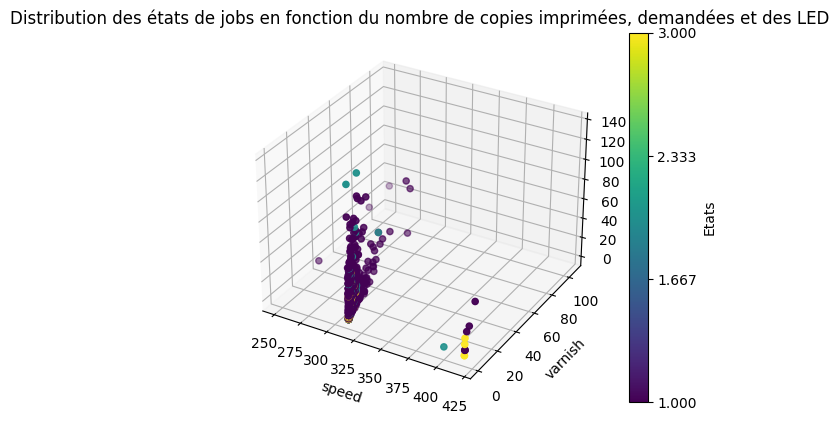

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some sample data
x = df['speed'][:1000]
y = df['varnishConsumptionVarnish_3d_job'][:1000]
z = df[['total_copies_event']][:1000]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
c = df[['jobState']][:1000]
scatter = ax.scatter(x, y, z, c=c, cmap='viridis')

# Customize the plot
ax.set_xlabel('speed')
ax.set_ylabel('varnish')
ax.set_zlabel('printed')
ax.set_title('Distribution des états de jobs en fonction du nombre de copies imprimées, demandées et des LED')

# Add colorbar with precise tick labels
cbar = fig.colorbar(scatter, ticks=np.linspace(min(c.jobState), max(c.jobState), num=4))
cbar.set_label('Etats')

# Show the plot
plt.show()

In [45]:
min(c.jobState)

1